## Twitter Sentiment Analysis - Cyberpunk 2077: A Complete Failure? 

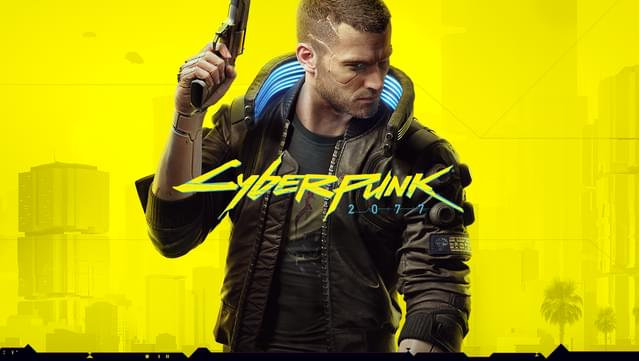

On December 10th, Cyberpunk2077 was released after around 9 years after garnering overwhelming hype and support. However, the release was met with harsh criticism from gaming journalists and gamers alike for its buggy and almost unplayable state for console users. On Reddit and major gaming review websites, Cyberpunk2077 continued to recieve complaints and negative press to the point that CD Projekt Red (studio of Cyberpunk2077) was issuing refunds for the game. In this project, I wanted to see if reputation of the game was as poor as what was being reflected in mainstream media. To get a clearer image of the games reputation, I did a sentiment analysis on the tweets related to Cyberpunk2077 five days before and after release. Did these negative, vocal opinions represent the majority or were most gamers silently enjoying the game despite the negative reviews? 

## Importing the necessary libraries/packages

In [1]:
import pandas as pd 
import numpy as np 
import datetime as dt
import langdetect
import csv

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from langdetect import detect

In [4]:
from datetime import datetime

In [5]:
import snscrape.modules.twitter as sntwitter

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Grabbing Tweets for Sentiment Analysis 

For tweet scraping, I used snscrape which allows me to grab more historical tweets as the Twitter API only allows for week old tweets. For this project, I tried to grab 100,000 tweets over a 10 day period, but what ended up happening was it would only get 100,000 tweets from the first day and stop instead of getting tweets across the specified period. 

tweetsbyday function grabs a specified number of tweets from each day in order to get tweets spread across the specified time period. 

In [7]:
def tweetsbyday(start_month, end_month, start_day, end_day): #day format: 12-10 (Dec 12)
    
    tweets_list = []
    
    
    for j in range(end_day-start_day):
        start_day1 = end_day 
        end_day1 = end_day + 1
        
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper("#cyberpunk2077 since:2020-"+ str(start_month)+ "-" + str(start_day1) +
                                                                " until:2020-"+ str(end_month)+ "-"+str(end_day1)).get_items()):
            if i > 20000:
                break 

            tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])
        
        end_day -= 1
    return tweets_list


In [251]:
tweet_data = tweetsbyday(12,12,4,14)

In [254]:
# tweet_data1 = tweet_data[0]

In [ ]:
tweet_data

In [253]:
df1 = pd.DataFrame(tweet_data)
df1.columns = ["Date","User ID", "Text", "Username"]
df1

,Date,User ID,Text,Username
0,2020-12-14 23:59:59+00:00,1338634877126762498,#Cyberpunk2077 #XboxShare https://t.co/BU87aPI422,almost5oclock
1,2020-12-29 07:22:14+00:00,1343819602678050818,집 벽이랑 화장실에 생긴 곰팡이 때문에 엄청 스트레스 받았는데 UUU 곰팡이제거제 ...,uuukorea3
2,2020-12-14 23:59:57+00:00,1338634868696047616,#cyberpunk2077 like #RedDeadRedemption2 and #g...,XIIHangedman
3,2020-12-14 23:59:57+00:00,1338634865953083396,#Cyberpunk2077 est quand même sacrements beau ...,Yrkanis
4,2020-12-14 23:59:55+00:00,1338634857816219648,#Cyberpunk2077 #XboxShare https://t.co/oRKUu8rRve,BibsGaming
...,...,...,...,...
157317,2020-12-05 00:00:15+00:00,1335011063591542791,"Quando você menos esperar, ele estará lá. #Cyb...",edsonrln
157318,2020-12-05 00:00:07+00:00,1335011031618363392,@FrandroidPromos @Micromania_Fr #Cyberpunk2077...,li_li_11_
157319,2020-12-05 00:00:05+00:00,1335011019807141894,A CD q me adie essa merda dnv\nE eu vo começa ...,V1t0rJc
157320,2020-12-05 00:00:02+00:00,1335011009933795328,120 hours left fellas #Cyberpunk2077,meerkat_wtf


In [13]:
# tweet_data = tweetsbyday(12,12,14,15)
# df2 = pd.DataFrame(tweet_data)
# df2.columns = ["Date","User ID", "Text", "Username"]

In [256]:
df1.to_csv('Cyberpunk2077_Tweets2.csv')

In [8]:
df1 = pd.read_csv('Cyberpunk2077_Tweets2.csv', index_col = 0)

In [9]:
def lang_detect(text):
    try: 
        return detect(text)
    
    except:
        return None 

In [45]:
# #Changing the tweet datetime to date meaning only including the date and not hour/min/sec
# df2["Date_2"] = pd.to_datetime(df2["Date"])

# df2["Date"] = df2['Date_2'].dt.date

# df2

,Date,User ID,Text,Username,Sentiment_compound_score,Date_2
0,2020-12-15,1338997260064071682,#Cyberpunk2077 time! Story missions until the ...,WeirdThingsMyH1,0.0000,2020-12-15 23:59:58+00:00
1,2020-12-15,1338997250043817984,It's all a bit of a mess...#Cyberpunk2077 #Cyb...,_KevinWasHere_,0.0000,2020-12-15 23:59:56+00:00
2,2020-12-15,1338997245249720320,O melhor do jogo\n#Cyberpunk2077\nÉ meter bala...,LuanFartel,0.0000,2020-12-15 23:59:55+00:00
3,2020-12-15,1338997238178123783,@IntroDatSamurai thanks for hanging out in the...,SneakedUp,0.8349,2020-12-15 23:59:53+00:00
4,2020-12-15,1338997237007978496,wow the PS1 version of #Cyberpunk2077 looks gr...,EricMrStruggle,0.8478,2020-12-15 23:59:53+00:00
5,2020-12-15,1338997232708759552,#Cyberpunk2077 #XboxShare https://t.co/KzWpYsjyqd,killertkr6,0.0000,2020-12-15 23:59:52+00:00
6,2020-12-15,1338997231936999425,"Yaaaaaaaay, more bugs that are ruining my game...",JackerTrack,0.0258,2020-12-15 23:59:52+00:00
7,2020-10-23,1319526643870789634,엄마가 앞머리 숱 때문에 하도 스트레스 받아하셔서 주문했는데 변화 보이세요?? 대박...,uuukorea4,0.0000,2020-10-23 06:30:42+00:00
8,2020-12-15,1338997230745886721,Laughing at all these console owners bitching ...,DatBeardGuy,-0.4753,2020-12-15 23:59:51+00:00
9,2020-12-15,1338997222969651202,"#PS5Share, #Cyberpunk2077 https://t.co/7vM0zKSKUV",FallenHunterX,0.0000,2020-12-15 23:59:49+00:00


In [10]:
analyzer =  SentimentIntensityAnalyzer()

In [ ]:
# #Making new column of sentiment compound scores

# df2["Sentiment_compound_score"] = df2["Text"].apply(lambda text: analyzer.polarity_scores(text).get("compound"))
# df2["Date"] = df2["Date"].apply(lambda x: x[])

In [15]:
#Making new column with the language of each tweet 

df1["Language"] = df1["Text"].apply(lambda text: lang_detect(text))


In [11]:
#Making new column of sentiment compound scores

df1["Sentiment_score"] = df1["Text"].apply(lambda text: analyzer.polarity_scores(text))
df1["Sentiment_compound_score"] = df1["Text"].apply(lambda text: analyzer.polarity_scores(text).get("compound"))

In [12]:
# #Changing the tweet datetime to date meaning only including the date and not hour/min/sec

df1["Date_2"] = pd.to_datetime(df1["Date"])

df1["Date"] = df1['Date_2'].dt.date

In [13]:
df1.drop("Date_2", inplace = True, axis = 1)

In [32]:
# df1.drop('Unnamed: 0', inplace = True, axis = 1)

In [32]:
df2 =df1.copy()

## Analyzing the langauge distribution of the tweets

By looking at the langauge distribution of the tweets, we can see where most of the tweet activity is taking place around the world, generally speaking (langauge =/= country). 

en    89784
id    11814
es    10993
fr     7029
de     6094
Name: Language, dtype: int64

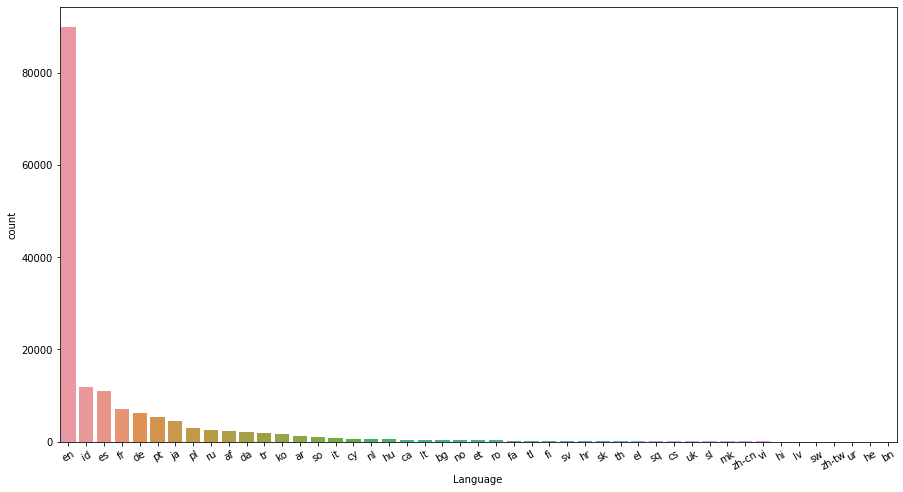

In [17]:
plt.figure(figsize =(15,8))

lang_plot = sns.countplot(df1["Language"], order = df1["Language"].value_counts().index)
ticks = lang_plot.get_xticklabels()
lang_plot.set_xticklabels(ticks,rotation=30);
df1["Language"].value_counts().head(5)

### Results from histogram
The histogram shows that the top 5 most used languages for Cyberpunk2077 related tweets are: 
1. English
2. Indonesian
3. Spanish
4. French
5. German  

Some takeaways: 
The fact that English speakers are more prone to comment about Cyberpunk2077 is not surprising, as this game is more geared towards console/PC gamers who tend to be from the US and other European countries. 

I expected more from Asian speaking countries such as China due to the size of the population; however, Twitter may not be the preferred medium for Chinese people. And being from South Korea, it was expected that this game would not gain much traction where gaming is mostly revolved around League of Legends and other massive multiplayer online games. 

## Histogram of Sentiment Compound Scores including Neutral tweets

The histogram reveals that there are more overall positive tweets compared to the negative tweets; however, the histogram does not show when these tweets were made. Hence, it is inconclusive whether or not the release of the game resulted in a more negative reaction or not. 


Average sentiment score was also calculated for each date including neutral tweets

In [18]:
average_sentiment = (df1[["Date","Sentiment_compound_score"]].groupby("Date").mean())

In [21]:
df1[["Date","Sentiment_compound_score"]].groupby("Date").count()

,Sentiment_compound_score
Date,
2020-10-23,4
2020-11-26,1
2020-12-05,3785
2020-12-06,4151
2020-12-07,15004
2020-12-08,14030
2020-12-09,19815
2020-12-10,19808
2020-12-11,19816


In [19]:
average_sentiment

,Sentiment_compound_score
Date,
2020-10-23,0.000000
2020-11-26,0.717700
2020-12-05,0.148004
2020-12-06,0.145572
2020-12-07,0.112256
2020-12-08,0.117527
2020-12-09,0.131036
2020-12-10,0.132120
2020-12-11,0.114188


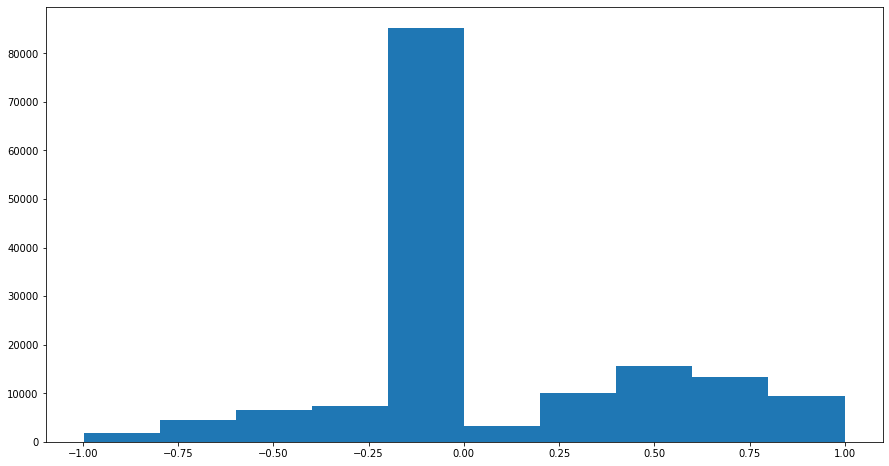

In [20]:
plt.figure(figsize =(15,8))

plt.hist(df1["Sentiment_compound_score"]);

## Analysis of Cyberpunk2077 Tweets excluding Neutral tweets

Due to the fact that a large portion of the data is neutral tweets, excluding those tweets may give a deeper insight into the Twitter community reaction to Cyberpunk 2077. 


In [22]:
# df_pn = df1[df1["Sentiment_compound_score"] != 0]

In [23]:
df_pn1 = df1[df1["Sentiment_compound_score"] != 0]

In [25]:
df_pn1 = df_pn1[(df_pn1["Date"]>= dt.date(2020,12,5)) & (df_pn1["Date"]<= dt.date(2020,12,15))]

In [33]:
df_pn1 = df_pn1[df1["Date"] != dt.date(2020,11,26)]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [26]:
df_pn1 = df_pn1[df_pn1["Language"] == "en"]

In [36]:
dff = df_pn1[df_pn1.Sentiment_compound_score != 0]

In [37]:
average_sentiment = (dff[["Date","Sentiment_compound_score"]].groupby("Date").mean())

In [38]:
average_sentiment

,Sentiment_compound_score
Date,
2020-12-05,0.314551
2020-12-06,0.316124
2020-12-07,0.294678
2020-12-08,0.280979
2020-12-09,0.336779
2020-12-10,0.306720
2020-12-11,0.279032
2020-12-12,0.286051
2020-12-13,0.301780


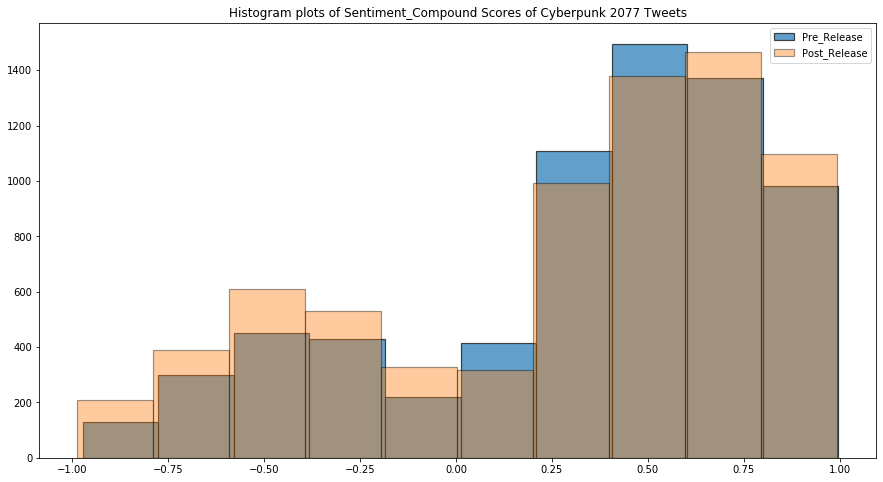

In [69]:
plt.figure(figsize =(15,8))
plt.hist(dff[dff["Date"]== dt.date(2020,12,9)]["Sentiment_compound_score"], alpha =0.7, edgecolor='black', linewidth=1.2);
plt.hist(dff[dff["Date"]== dt.date(2020,12,11)]["Sentiment_compound_score"], alpha = 0.4, edgecolor='black', linewidth=1.2);

plt.legend(["Pre_Release", "Post_Release"])
plt.title("Histogram plots of Sentiment_Compound Scores of Cyberpunk 2077 Tweets");
plt.show()


In [72]:
print("Number of tweets 1 day before release: ",  dff[dff["Date"]== dt.date(2020,12,9)]["Date"].count())
print("Number of tweets 1 day after release: ", dff[dff["Date"]== dt.date(2020,12,11)]["Date"].count())

Number of tweets 1 day before release:  6903
Number of tweets 1 day after release:  7316


## Quick Analysis 
The histogram shows that the number of negative tweets increased post-release. Despite that increase of negative tweets, the number of intensly positive tweets have also increased. Keep in mind that there are a higher number of tweets post release. Definetly need to look more deeply into this.

In [39]:
average_sentiment = (df_pn1[["Date","Sentiment_compound_score"]].groupby("Date").mean())

In [41]:
order1 = df_pn1["Date"].sort_values().unique()

2020-12-10    7700
2020-12-11    7316
2020-12-14    6914
2020-12-09    6903
2020-12-13    6511
Name: Date, dtype: int64

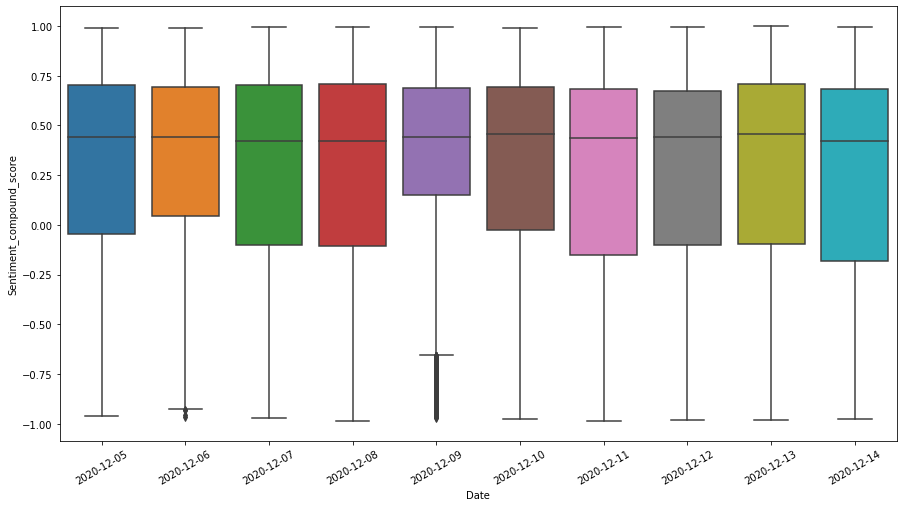

In [48]:
plt.figure(figsize =(15,8))
bp = sns.boxplot(x = "Date", y= "Sentiment_compound_score", data=dff, order = order1)
ticks = bp.get_xticklabels()
bp.set_xticklabels(ticks,rotation=30);
dff["Date"].value_counts().head(5)

## Context for the Data Visualization 
On 12/06 and 12/07, the distribution of tweet sentiment scores are larger. A possible reason for that could be that CD Projekt Red did not give out review copies for game reviewers, thus people were growing skeptical about the game's status. Not only that, consumers saw it as shady that the studio wanted to prevent early access to the full game. 


12/10 - Release Date 


12/13 - Cyberpunk2077 receives a big patch to fix the games numerous bugs, which could have led to higher sentiment scores. 

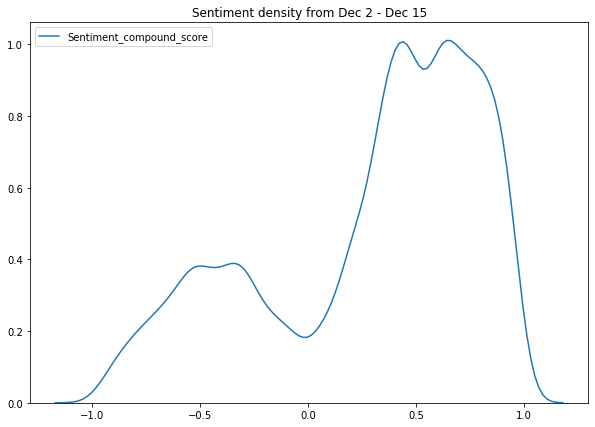

In [43]:
plt.figure(figsize =(10,7))

sns.kdeplot(dff["Sentiment_compound_score"])
plt.title("Sentiment density from Dec 2 - Dec 15");

In [44]:
after_release = dff[dff["Date"]>= dt.date(2020,12,10)]
before_release = dff[dff["Date"]<= dt.date(2020,12,10)]

Text(0.5, 1.0, 'Density plots of Sentiment_Compound Scores of Cyberpunk 2077 Tweets')

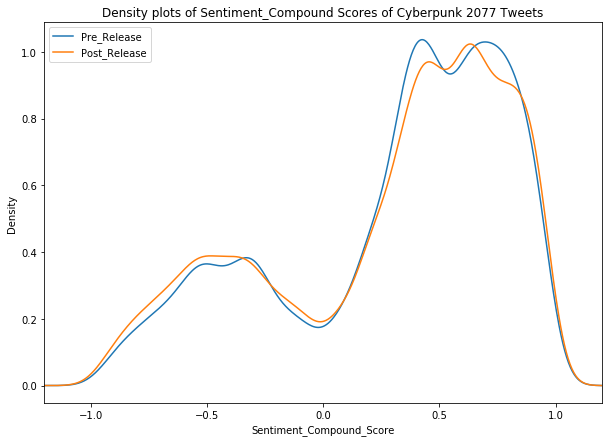

In [47]:
plt.figure(figsize =(10,7))



before_release["Sentiment_compound_score"].plot(kind = "density")
after_release["Sentiment_compound_score"].plot(kind = "density")

# sns.kdeplot(after_release["Sentiment_compound_score"])

plt.xlim([-1.2,1.2])
plt.xlabel("Sentiment_Compound_Score")
plt.legend(["Pre_Release", "Post_Release"])
plt.title("Density plots of Sentiment_Compound Scores of Cyberpunk 2077 Tweets");


## Analysis 
The KDE plots from pre- and post-release do not differ as much; however, there is a slight increase in negative sentiment tweets and a decrease in intensity of positive tweets post-release. The data is suprising, as the Reddit community and online gaming journalists were quite negative about the game's release. As a result, my perception of the Cyberpunk2077's image was casted in a negative light, but it may be the result of a vocal minority

## Conclusion 
Cyberpunk2077, as of now, is still receiving positive feedback and the general populace is enjoying the game. Even with the constant negative press that the game got, majority of people are have positive experiences with the game. Cyberpunk2077 did not crash and burn, as some people expected and there could be a number of reasons why the game is performing well despite the controversies: 

1. The number of pre-orders were in the millions (est. 8 million copies from pre-orders alone) --> could have boosted positive sentiment as there is a large group of dedicated fans 


2. CD Projekt Red is continually patching and fixing the game to make the game more playable 


3. The studio admitted their mistakes and issued refunds without question or regard to playtime, which can be seen as deep sense of remorse from the company's side. As a result, they won back some lost trust with customers. 


4. The number of tweets that I scraped was simply not enough to get the complete picture 


5. Cyberpunk2077 marketing did a fantastic job in making die-hard fans that would overlook the bugs and flaws of the game. Essentially, customers are trying to justify their sunk-cost into the game (time, money, and unrealistic expectations). 